In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Italy/Veneto/Culex/IT_veneto_culex_2010_2022.csv')
#=====================================================================
data = data[data.trap_type != 'Gravid Trap']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/Italy_veneto_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/Italy_veneto_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN class regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Italy/Veneto/Culex/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'classification'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, 10, dropna=True)

Bounds: [   0.    4.    9.   18.   33.   56.   93.  155.  266.  535. 7463.]


In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=10,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 50, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 0.09917 | Val Loss: 0.09009 | Train Acc: 3.184| Val Acc: 2.829
Epoch 002: | Train Loss: 0.09391 | Val Loss: 0.08726 | Train Acc: 2.941| Val Acc: 2.518
Epoch 003: | Train Loss: 0.09013 | Val Loss: 0.08574 | Train Acc: 2.729| Val Acc: 2.489
Epoch 004: | Train Loss: 0.08839 | Val Loss: 0.08499 | Train Acc: 2.495| Val Acc: 2.288
Epoch 005: | Train Loss: 0.08724 | Val Loss: 0.08454 | Train Acc: 2.407| Val Acc: 2.268
Epoch 006: | Train Loss: 0.08626 | Val Loss: 0.08397 | Train Acc: 2.255| Val Acc: 2.187
Epoch 007: | Train Loss: 0.08550 | Val Loss: 0.08350 | Train Acc: 2.203| Val Acc: 2.100
Epoch 008: | Train Loss: 0.08462 | Val Loss: 0.08297 | Train Acc: 2.092| Val Acc: 2.062
Epoch 009: | Train Loss: 0.08449 | Val Loss: 0.08244 | Train Acc: 2.030| Val Acc: 2.031
Epoch 010: | Train Loss: 0.08373 | Val Loss: 0.08205 | Train Acc: 1.959| Val Acc: 1.934
Epoch 011: | Train Loss: 0.08336 | Val Loss: 0.08165 | Train Acc: 1.943| Val Acc: 1.867
Epoch 012: | Train Loss: 0.08305

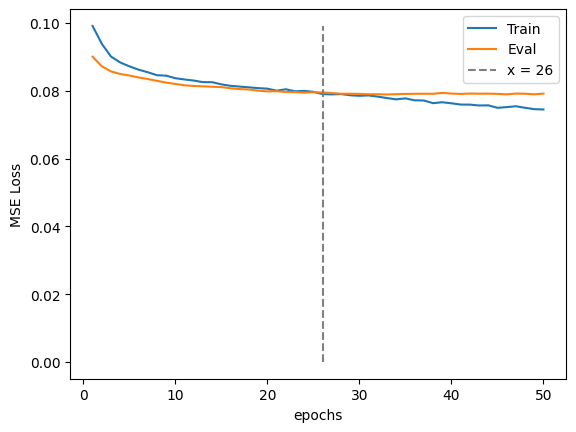

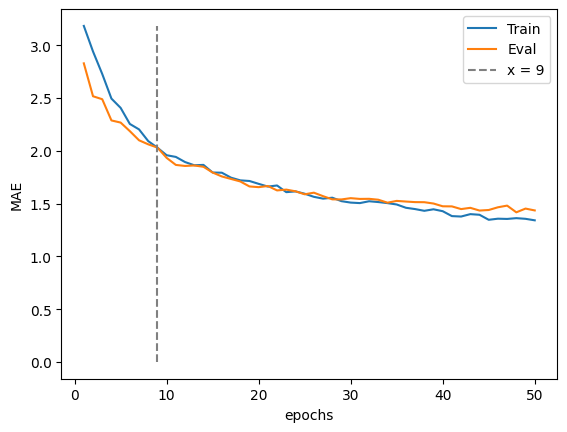

MAE on train set:  1.0677705044281864
min prediction: 0
max prediction: 9

MAE on test set:  1.4355731225296442
Error <= 3: 91.38 %
min prediction: 0
max prediction: 9


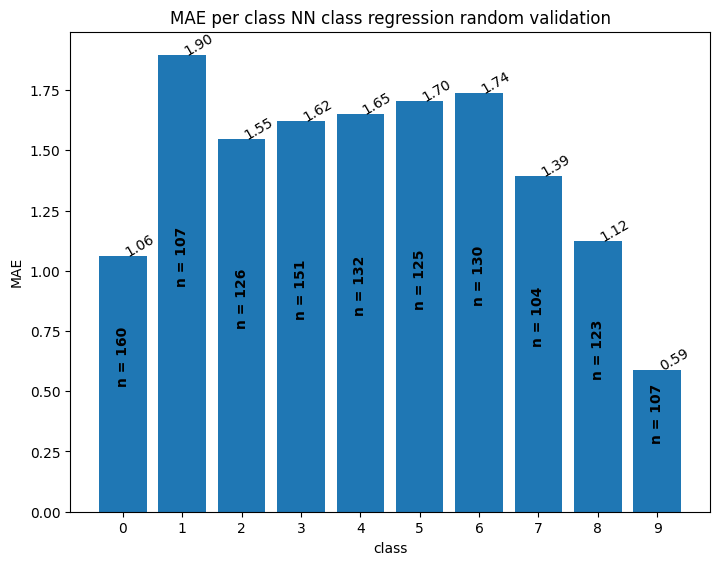

-----------|class error-MAE| difference-----------
mean: 0.8440925123751588
std: 0.37778991886661784
coefficient of variation (std/mean): 0.44756932839454955

----------normalized difference-------------
mean: 0.6451278487438714
std: 0.28873943799091506


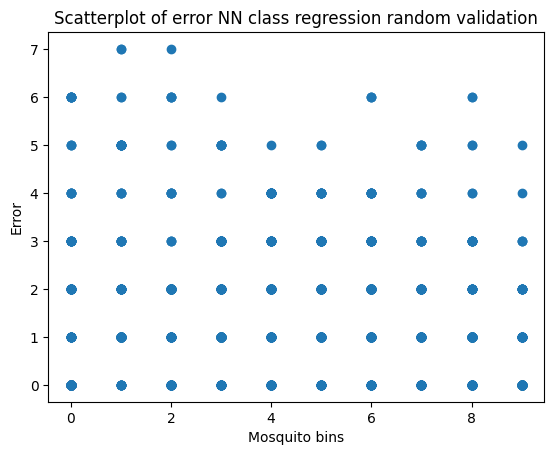

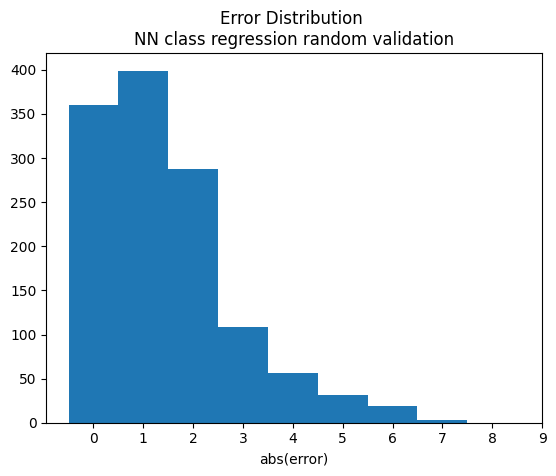

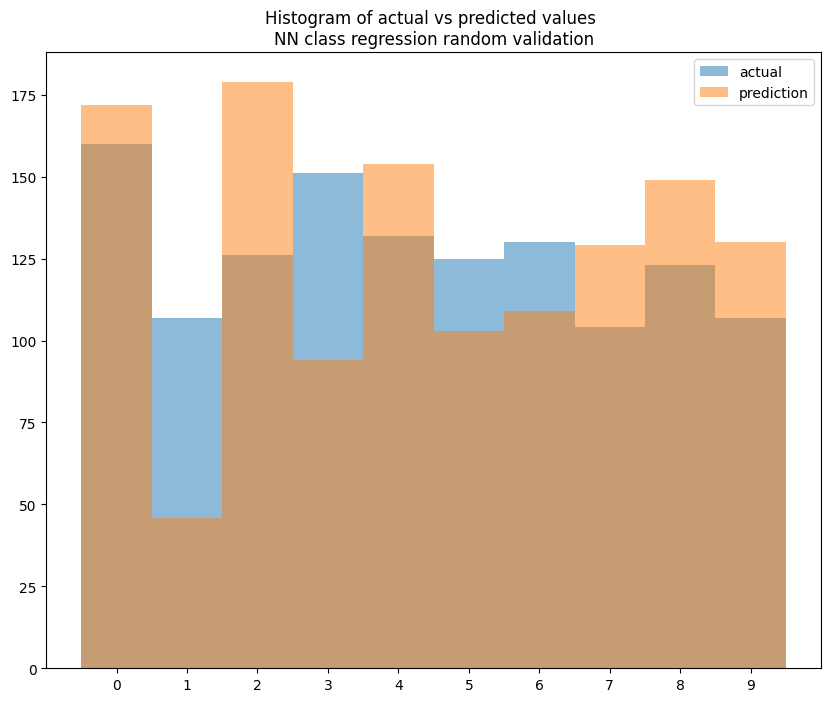

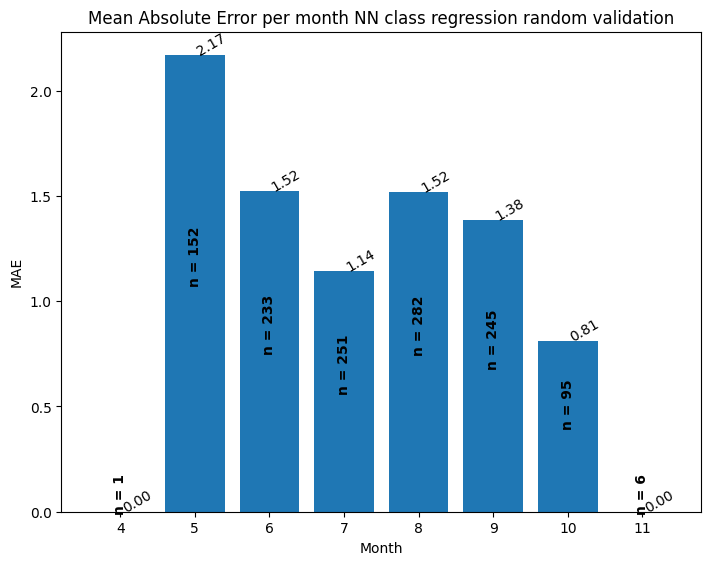

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 0.09843 | Val Loss: 0.08996 | Train Acc: 3.167| Val Acc: 2.680
Epoch 002: | Train Loss: 0.09277 | Val Loss: 0.08681 | Train Acc: 2.896| Val Acc: 2.427
Epoch 003: | Train Loss: 0.08935 | Val Loss: 0.08619 | Train Acc: 2.616| Val Acc: 2.351
Epoch 004: | Train Loss: 0.08760 | Val Loss: 0.08520 | Train Acc: 2.441| Val Acc: 2.255
Epoch 005: | Train Loss: 0.08655 | Val Loss: 0.08483 | Train Acc: 2.318| Val Acc: 2.090
Epoch 006: | Train Loss: 0.08588 | Val Loss: 0.08435 | Train Acc: 2.211| Val Acc: 2.035
Epoch 007: | Train Loss: 0.08518 | Val Loss: 0.08390 | Train Acc: 2.169| Val Acc: 1.917
Epoch 008: | Train Loss: 0.08447 | Val Loss: 0.08361 | Train Acc: 2.072| Val Acc: 1.937
Epoch 009: | Train Loss: 0.08374 | Val Loss: 0.08325 | Train Acc: 2.020| Val Acc: 1.859
Epoch 010: | Train Loss: 0.08368 | Val Loss: 0.08288 | Train Acc: 1.948| Val Acc: 1.813
Epoch 011: | Train Loss: 0.08314 | Val Loss: 0.08273 | Train Acc: 1.909| Val Acc: 1.765
Epoch 012: | Train Loss: 0.08270

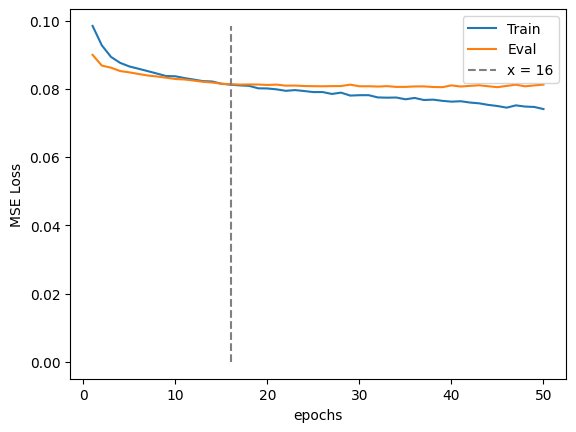

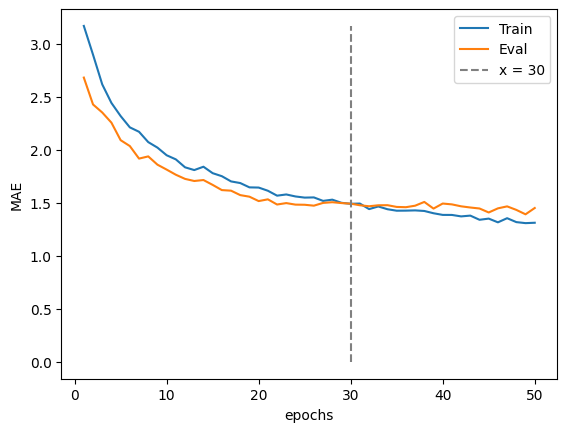

Epoch 001: | Train Loss: 0.09852 | Val Loss: 0.08997 | Train Acc: 3.203| Val Acc: 2.792
Epoch 002: | Train Loss: 0.09270 | Val Loss: 0.08633 | Train Acc: 2.856| Val Acc: 2.526
Epoch 003: | Train Loss: 0.08939 | Val Loss: 0.08527 | Train Acc: 2.594| Val Acc: 2.325
Epoch 004: | Train Loss: 0.08766 | Val Loss: 0.08453 | Train Acc: 2.426| Val Acc: 2.180
Epoch 005: | Train Loss: 0.08634 | Val Loss: 0.08397 | Train Acc: 2.295| Val Acc: 2.240
Epoch 006: | Train Loss: 0.08564 | Val Loss: 0.08356 | Train Acc: 2.192| Val Acc: 2.151
Epoch 007: | Train Loss: 0.08540 | Val Loss: 0.08287 | Train Acc: 2.131| Val Acc: 2.069
Epoch 008: | Train Loss: 0.08444 | Val Loss: 0.08236 | Train Acc: 2.053| Val Acc: 2.023
Epoch 009: | Train Loss: 0.08402 | Val Loss: 0.08224 | Train Acc: 1.992| Val Acc: 1.962
Epoch 010: | Train Loss: 0.08320 | Val Loss: 0.08195 | Train Acc: 1.903| Val Acc: 1.880
Epoch 011: | Train Loss: 0.08300 | Val Loss: 0.08167 | Train Acc: 1.899| Val Acc: 1.896
Epoch 012: | Train Loss: 0.08254

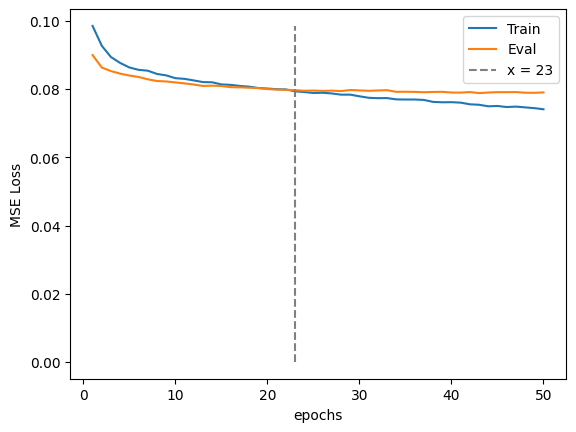

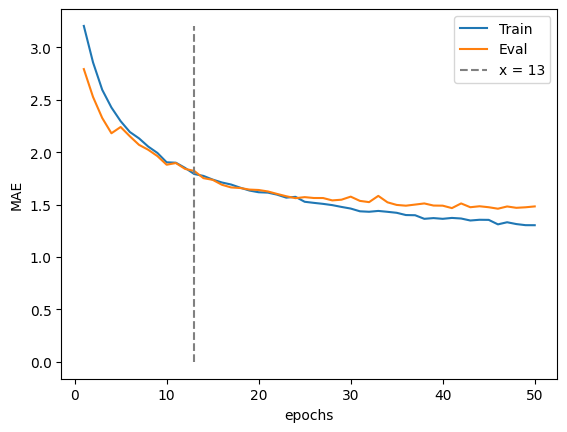

Epoch 001: | Train Loss: 0.09871 | Val Loss: 0.09052 | Train Acc: 3.159| Val Acc: 2.619
Epoch 002: | Train Loss: 0.09294 | Val Loss: 0.08711 | Train Acc: 2.832| Val Acc: 2.481
Epoch 003: | Train Loss: 0.08919 | Val Loss: 0.08557 | Train Acc: 2.587| Val Acc: 2.376
Epoch 004: | Train Loss: 0.08763 | Val Loss: 0.08498 | Train Acc: 2.409| Val Acc: 2.256
Epoch 005: | Train Loss: 0.08677 | Val Loss: 0.08456 | Train Acc: 2.324| Val Acc: 2.254
Epoch 006: | Train Loss: 0.08584 | Val Loss: 0.08396 | Train Acc: 2.208| Val Acc: 2.058
Epoch 007: | Train Loss: 0.08512 | Val Loss: 0.08335 | Train Acc: 2.097| Val Acc: 1.974
Epoch 008: | Train Loss: 0.08457 | Val Loss: 0.08277 | Train Acc: 2.037| Val Acc: 1.928
Epoch 009: | Train Loss: 0.08409 | Val Loss: 0.08251 | Train Acc: 1.997| Val Acc: 1.871
Epoch 010: | Train Loss: 0.08330 | Val Loss: 0.08226 | Train Acc: 1.931| Val Acc: 1.824
Epoch 011: | Train Loss: 0.08313 | Val Loss: 0.08178 | Train Acc: 1.892| Val Acc: 1.751
Epoch 012: | Train Loss: 0.08246

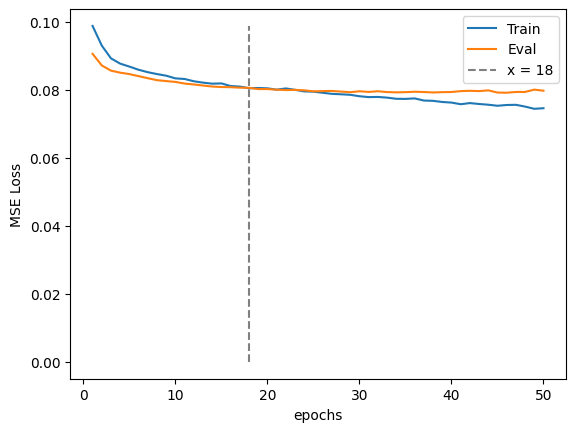

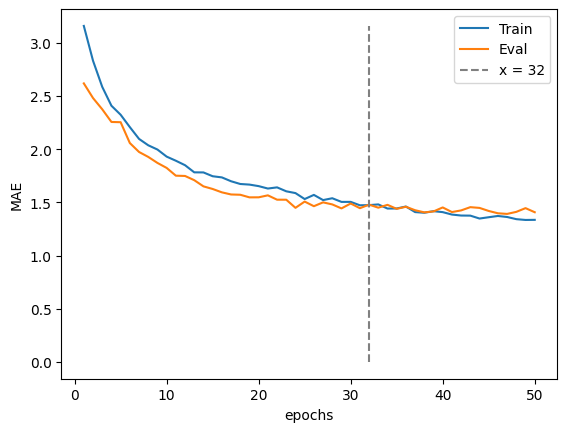

Epoch 001: | Train Loss: 0.09902 | Val Loss: 0.09042 | Train Acc: 3.169| Val Acc: 2.584
Epoch 002: | Train Loss: 0.09302 | Val Loss: 0.08616 | Train Acc: 2.857| Val Acc: 2.400
Epoch 003: | Train Loss: 0.08942 | Val Loss: 0.08433 | Train Acc: 2.585| Val Acc: 2.310
Epoch 004: | Train Loss: 0.08759 | Val Loss: 0.08376 | Train Acc: 2.415| Val Acc: 2.165
Epoch 005: | Train Loss: 0.08684 | Val Loss: 0.08313 | Train Acc: 2.280| Val Acc: 2.144
Epoch 006: | Train Loss: 0.08585 | Val Loss: 0.08255 | Train Acc: 2.195| Val Acc: 1.971
Epoch 007: | Train Loss: 0.08523 | Val Loss: 0.08231 | Train Acc: 2.142| Val Acc: 1.986
Epoch 008: | Train Loss: 0.08475 | Val Loss: 0.08194 | Train Acc: 2.086| Val Acc: 1.891
Epoch 009: | Train Loss: 0.08383 | Val Loss: 0.08168 | Train Acc: 1.994| Val Acc: 1.909
Epoch 010: | Train Loss: 0.08361 | Val Loss: 0.08136 | Train Acc: 1.948| Val Acc: 1.835
Epoch 011: | Train Loss: 0.08297 | Val Loss: 0.08099 | Train Acc: 1.909| Val Acc: 1.778
Epoch 012: | Train Loss: 0.08275

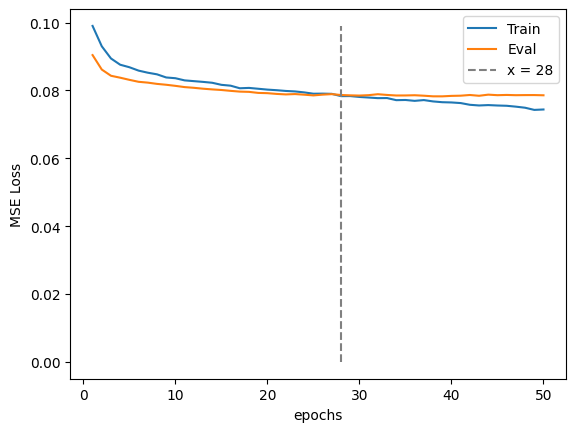

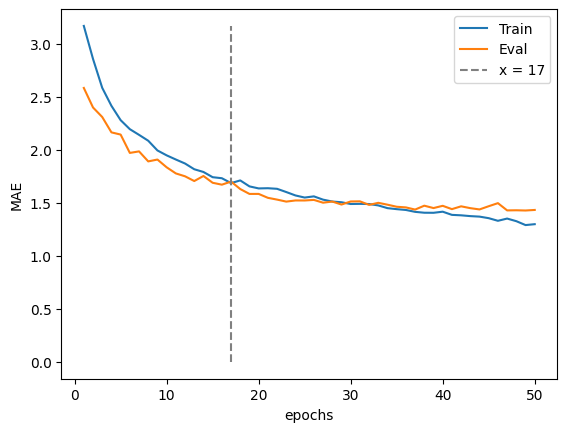

Epoch 001: | Train Loss: 0.09900 | Val Loss: 0.09007 | Train Acc: 3.209| Val Acc: 2.682
Epoch 002: | Train Loss: 0.09295 | Val Loss: 0.08669 | Train Acc: 2.868| Val Acc: 2.544
Epoch 003: | Train Loss: 0.08931 | Val Loss: 0.08552 | Train Acc: 2.642| Val Acc: 2.444
Epoch 004: | Train Loss: 0.08773 | Val Loss: 0.08505 | Train Acc: 2.419| Val Acc: 2.273
Epoch 005: | Train Loss: 0.08639 | Val Loss: 0.08453 | Train Acc: 2.267| Val Acc: 2.213
Epoch 006: | Train Loss: 0.08583 | Val Loss: 0.08399 | Train Acc: 2.201| Val Acc: 2.121
Epoch 007: | Train Loss: 0.08513 | Val Loss: 0.08340 | Train Acc: 2.127| Val Acc: 2.038
Epoch 008: | Train Loss: 0.08447 | Val Loss: 0.08293 | Train Acc: 2.048| Val Acc: 1.943
Epoch 009: | Train Loss: 0.08365 | Val Loss: 0.08284 | Train Acc: 1.985| Val Acc: 1.865
Epoch 010: | Train Loss: 0.08337 | Val Loss: 0.08249 | Train Acc: 1.979| Val Acc: 1.876
Epoch 011: | Train Loss: 0.08299 | Val Loss: 0.08187 | Train Acc: 1.879| Val Acc: 1.784
Epoch 012: | Train Loss: 0.08281

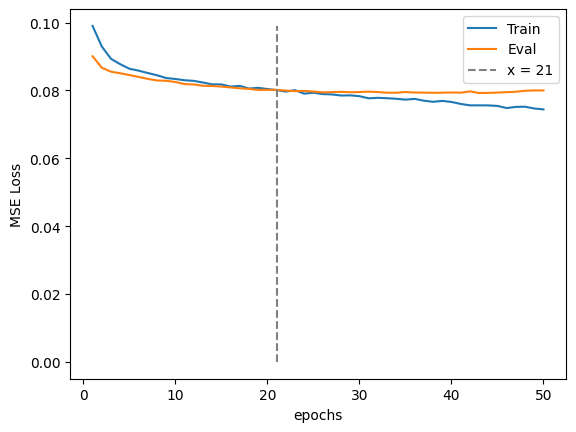

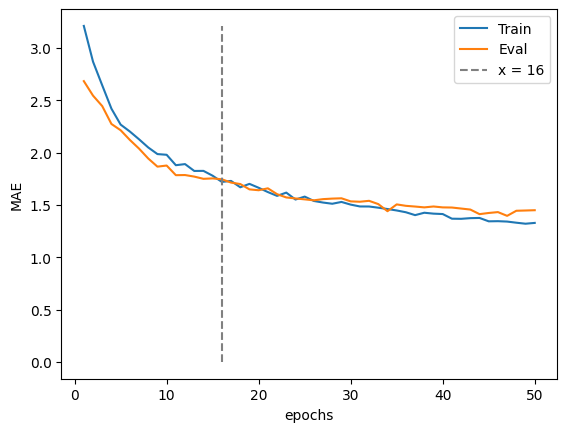

Epoch 001: | Train Loss: 0.09880 | Val Loss: 0.08923 | Train Acc: 3.164| Val Acc: 2.504
Epoch 002: | Train Loss: 0.09298 | Val Loss: 0.08701 | Train Acc: 2.850| Val Acc: 2.416
Epoch 003: | Train Loss: 0.08924 | Val Loss: 0.08636 | Train Acc: 2.569| Val Acc: 2.201
Epoch 004: | Train Loss: 0.08761 | Val Loss: 0.08558 | Train Acc: 2.413| Val Acc: 2.086
Epoch 005: | Train Loss: 0.08650 | Val Loss: 0.08500 | Train Acc: 2.293| Val Acc: 2.050
Epoch 006: | Train Loss: 0.08574 | Val Loss: 0.08466 | Train Acc: 2.211| Val Acc: 2.019
Epoch 007: | Train Loss: 0.08495 | Val Loss: 0.08423 | Train Acc: 2.096| Val Acc: 1.917
Epoch 008: | Train Loss: 0.08413 | Val Loss: 0.08368 | Train Acc: 2.056| Val Acc: 1.876
Epoch 009: | Train Loss: 0.08381 | Val Loss: 0.08292 | Train Acc: 1.950| Val Acc: 1.786
Epoch 010: | Train Loss: 0.08334 | Val Loss: 0.08268 | Train Acc: 1.904| Val Acc: 1.734
Epoch 011: | Train Loss: 0.08315 | Val Loss: 0.08222 | Train Acc: 1.908| Val Acc: 1.718
Epoch 012: | Train Loss: 0.08254

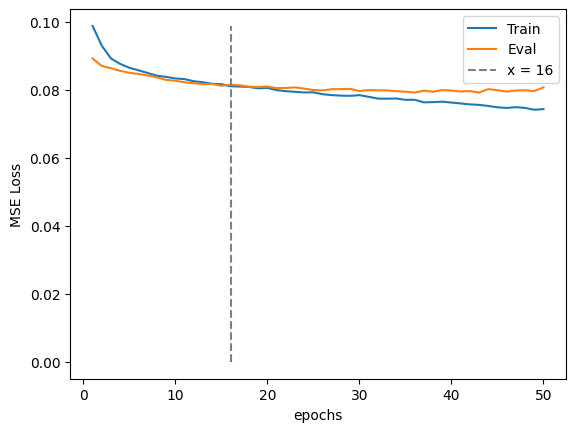

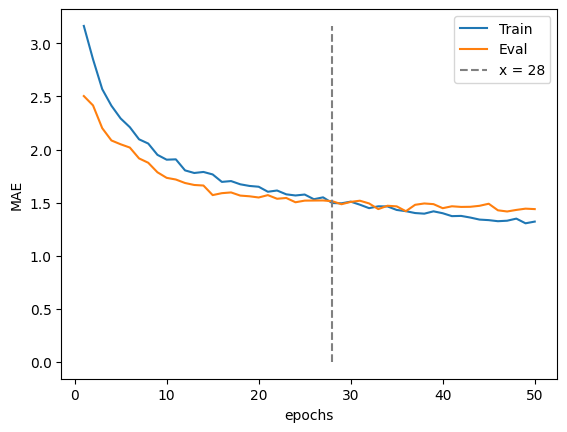

Epoch 001: | Train Loss: 0.09857 | Val Loss: 0.08995 | Train Acc: 3.143| Val Acc: 2.727
Epoch 002: | Train Loss: 0.09313 | Val Loss: 0.08720 | Train Acc: 2.842| Val Acc: 2.369
Epoch 003: | Train Loss: 0.08956 | Val Loss: 0.08544 | Train Acc: 2.593| Val Acc: 2.260
Epoch 004: | Train Loss: 0.08817 | Val Loss: 0.08474 | Train Acc: 2.449| Val Acc: 2.131
Epoch 005: | Train Loss: 0.08686 | Val Loss: 0.08401 | Train Acc: 2.321| Val Acc: 2.012
Epoch 006: | Train Loss: 0.08598 | Val Loss: 0.08336 | Train Acc: 2.240| Val Acc: 1.932
Epoch 007: | Train Loss: 0.08540 | Val Loss: 0.08277 | Train Acc: 2.164| Val Acc: 1.840
Epoch 008: | Train Loss: 0.08435 | Val Loss: 0.08220 | Train Acc: 2.054| Val Acc: 1.768
Epoch 009: | Train Loss: 0.08413 | Val Loss: 0.08188 | Train Acc: 1.982| Val Acc: 1.709
Epoch 010: | Train Loss: 0.08367 | Val Loss: 0.08152 | Train Acc: 1.950| Val Acc: 1.688
Epoch 011: | Train Loss: 0.08279 | Val Loss: 0.08122 | Train Acc: 1.866| Val Acc: 1.661
Epoch 012: | Train Loss: 0.08243

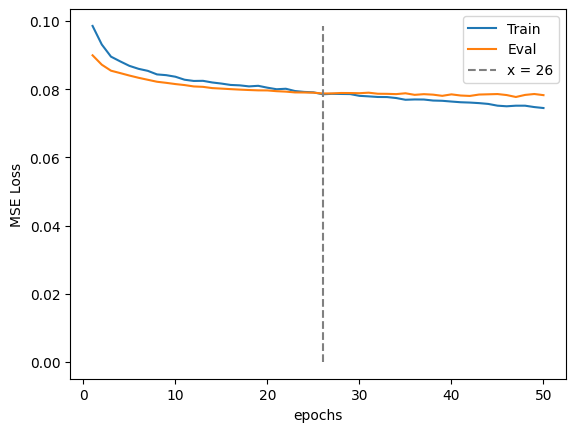

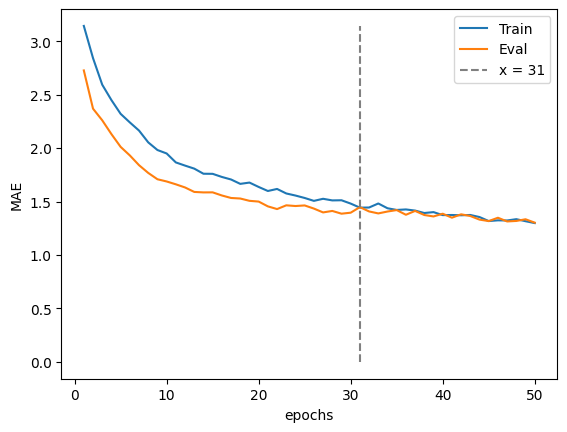

Epoch 001: | Train Loss: 0.09850 | Val Loss: 0.09067 | Train Acc: 3.129| Val Acc: 2.737
Epoch 002: | Train Loss: 0.09319 | Val Loss: 0.08798 | Train Acc: 2.860| Val Acc: 2.542
Epoch 003: | Train Loss: 0.08938 | Val Loss: 0.08644 | Train Acc: 2.604| Val Acc: 2.309
Epoch 004: | Train Loss: 0.08768 | Val Loss: 0.08532 | Train Acc: 2.396| Val Acc: 2.207
Epoch 005: | Train Loss: 0.08665 | Val Loss: 0.08474 | Train Acc: 2.288| Val Acc: 2.117
Epoch 006: | Train Loss: 0.08551 | Val Loss: 0.08438 | Train Acc: 2.171| Val Acc: 2.079
Epoch 007: | Train Loss: 0.08483 | Val Loss: 0.08382 | Train Acc: 2.085| Val Acc: 1.996
Epoch 008: | Train Loss: 0.08446 | Val Loss: 0.08326 | Train Acc: 2.026| Val Acc: 1.886
Epoch 009: | Train Loss: 0.08381 | Val Loss: 0.08301 | Train Acc: 1.989| Val Acc: 1.895
Epoch 010: | Train Loss: 0.08322 | Val Loss: 0.08261 | Train Acc: 1.927| Val Acc: 1.802
Epoch 011: | Train Loss: 0.08288 | Val Loss: 0.08218 | Train Acc: 1.910| Val Acc: 1.798
Epoch 012: | Train Loss: 0.08223

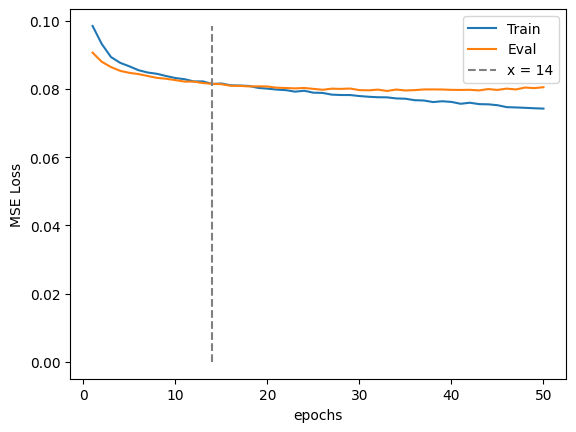

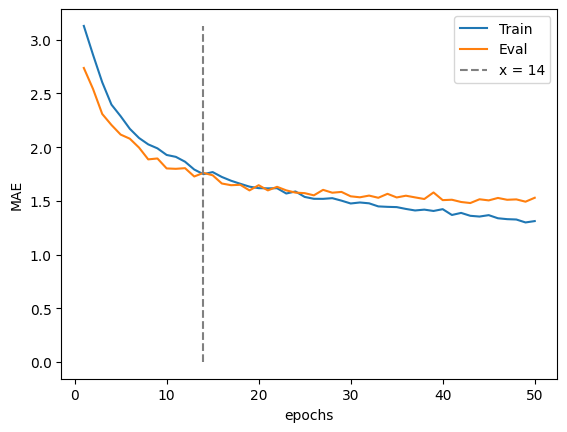

Epoch 001: | Train Loss: 0.09868 | Val Loss: 0.08972 | Train Acc: 3.146| Val Acc: 2.691
Epoch 002: | Train Loss: 0.09275 | Val Loss: 0.08607 | Train Acc: 2.885| Val Acc: 2.468
Epoch 003: | Train Loss: 0.08953 | Val Loss: 0.08462 | Train Acc: 2.635| Val Acc: 2.343
Epoch 004: | Train Loss: 0.08741 | Val Loss: 0.08381 | Train Acc: 2.415| Val Acc: 2.260
Epoch 005: | Train Loss: 0.08653 | Val Loss: 0.08346 | Train Acc: 2.272| Val Acc: 2.161
Epoch 006: | Train Loss: 0.08583 | Val Loss: 0.08301 | Train Acc: 2.226| Val Acc: 2.159
Epoch 007: | Train Loss: 0.08518 | Val Loss: 0.08239 | Train Acc: 2.118| Val Acc: 1.959
Epoch 008: | Train Loss: 0.08477 | Val Loss: 0.08210 | Train Acc: 2.089| Val Acc: 1.949
Epoch 009: | Train Loss: 0.08393 | Val Loss: 0.08146 | Train Acc: 1.986| Val Acc: 1.860
Epoch 010: | Train Loss: 0.08323 | Val Loss: 0.08133 | Train Acc: 1.902| Val Acc: 1.848
Epoch 011: | Train Loss: 0.08290 | Val Loss: 0.08104 | Train Acc: 1.876| Val Acc: 1.770
Epoch 012: | Train Loss: 0.08272

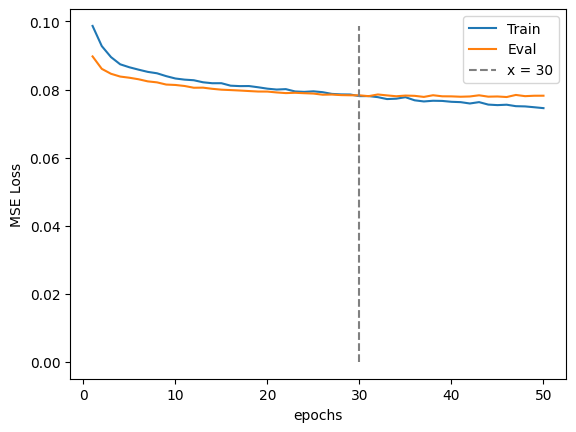

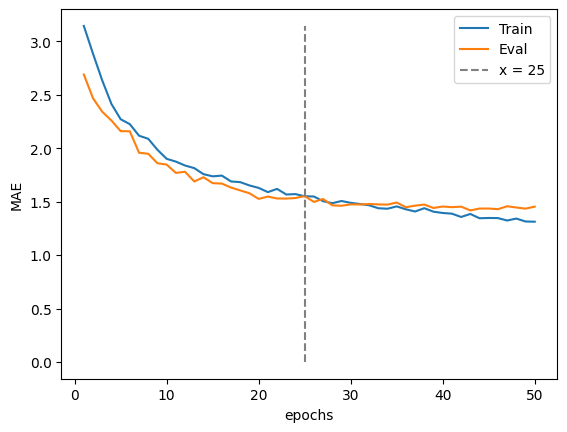

Epoch 001: | Train Loss: 0.09921 | Val Loss: 0.09040 | Train Acc: 3.186| Val Acc: 2.798
Epoch 002: | Train Loss: 0.09284 | Val Loss: 0.08697 | Train Acc: 2.895| Val Acc: 2.825
Epoch 003: | Train Loss: 0.08945 | Val Loss: 0.08580 | Train Acc: 2.625| Val Acc: 2.607
Epoch 004: | Train Loss: 0.08779 | Val Loss: 0.08482 | Train Acc: 2.461| Val Acc: 2.403
Epoch 005: | Train Loss: 0.08695 | Val Loss: 0.08427 | Train Acc: 2.339| Val Acc: 2.259
Epoch 006: | Train Loss: 0.08612 | Val Loss: 0.08372 | Train Acc: 2.246| Val Acc: 2.192
Epoch 007: | Train Loss: 0.08523 | Val Loss: 0.08322 | Train Acc: 2.182| Val Acc: 2.107
Epoch 008: | Train Loss: 0.08469 | Val Loss: 0.08281 | Train Acc: 2.095| Val Acc: 2.063
Epoch 009: | Train Loss: 0.08413 | Val Loss: 0.08252 | Train Acc: 2.011| Val Acc: 2.021
Epoch 010: | Train Loss: 0.08363 | Val Loss: 0.08203 | Train Acc: 1.938| Val Acc: 1.951
Epoch 011: | Train Loss: 0.08322 | Val Loss: 0.08183 | Train Acc: 1.924| Val Acc: 1.914
Epoch 012: | Train Loss: 0.08304

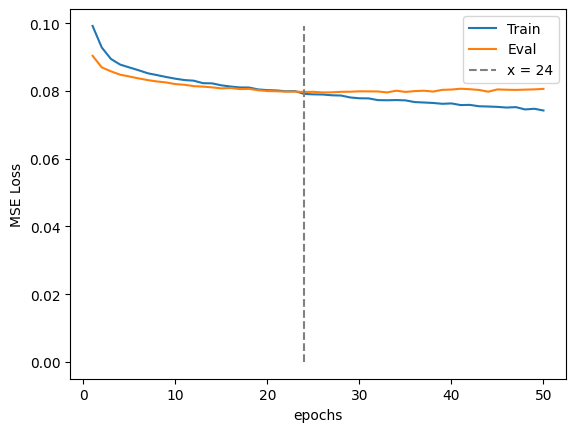

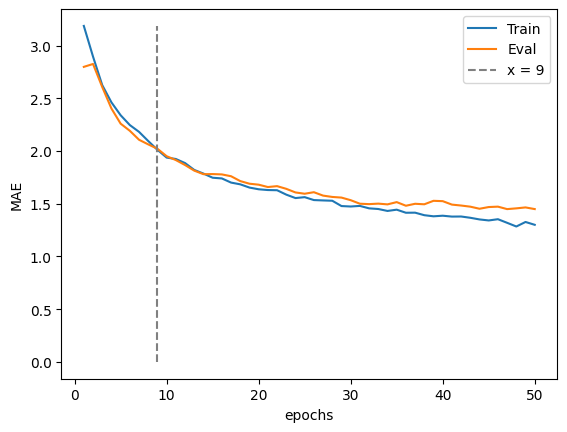

MAE on train set:  1.0374409497216515
min prediction: 0
max prediction: 9

MAE on test set:  1.4406511774932829
Error <= 3: 91.75 %
min prediction: 0
max prediction: 9


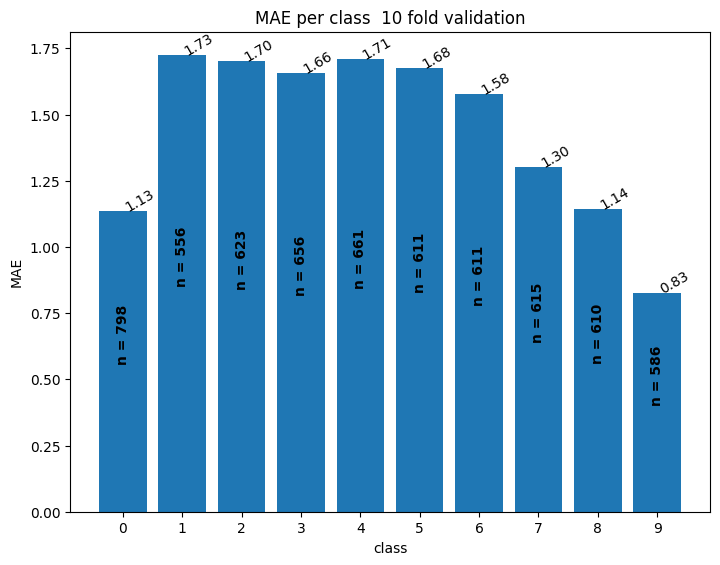

-----------|class error-MAE| difference-----------
mean: 0.6198788623286499
std: 0.30398729594528817
coefficient of variation (std/mean): 0.49039790581553816

----------normalized difference-------------
mean: 0.6882341864145609
std: 0.3375086037283614


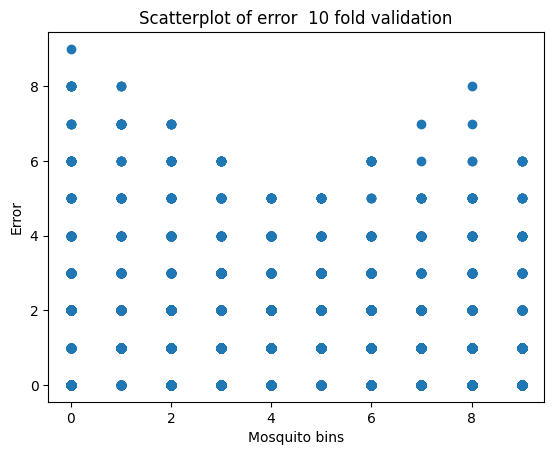

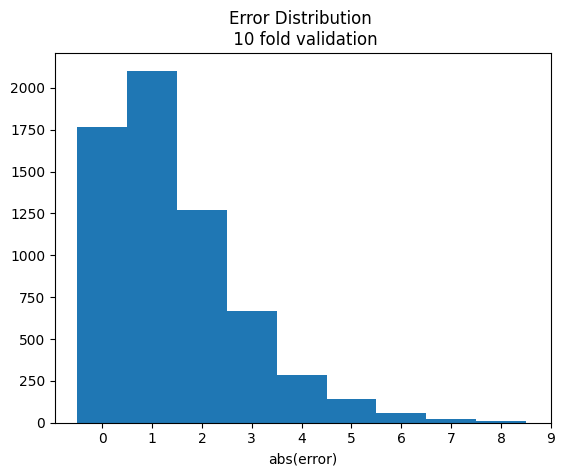

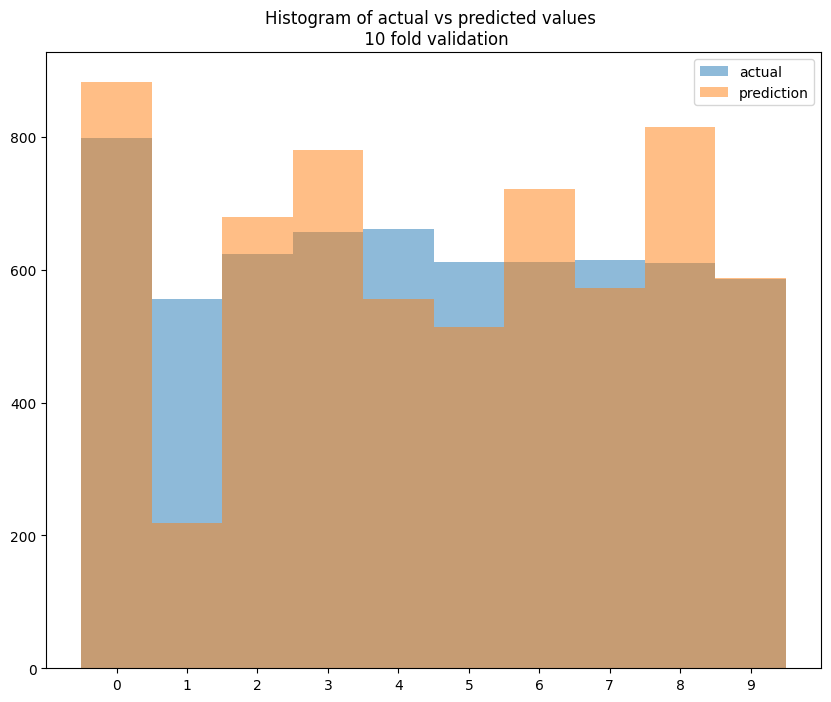

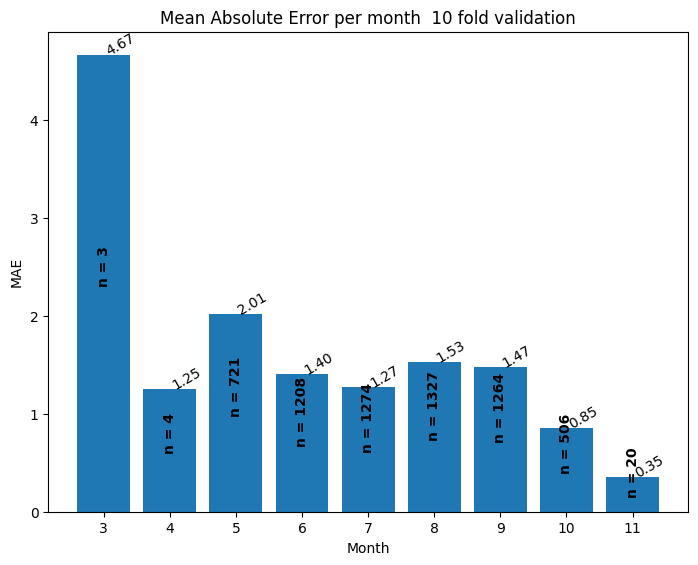

In [9]:
train_model_KFold(data, model, date_col=date_col)

Epoch 001: | Train Loss: 0.09889 | Val Loss: 0.11847 | Train Acc: 3.170| Val Acc: 2.037
Epoch 002: | Train Loss: 0.09273 | Val Loss: 0.09820 | Train Acc: 2.864| Val Acc: 2.079
Epoch 003: | Train Loss: 0.08899 | Val Loss: 0.09008 | Train Acc: 2.617| Val Acc: 2.078
Epoch 004: | Train Loss: 0.08715 | Val Loss: 0.09430 | Train Acc: 2.393| Val Acc: 2.679
Epoch 005: | Train Loss: 0.08641 | Val Loss: 0.08799 | Train Acc: 2.321| Val Acc: 2.167
Epoch 006: | Train Loss: 0.08541 | Val Loss: 0.09802 | Train Acc: 2.182| Val Acc: 3.014
Epoch 007: | Train Loss: 0.08479 | Val Loss: 0.09268 | Train Acc: 2.130| Val Acc: 2.828
Epoch 008: | Train Loss: 0.08401 | Val Loss: 0.10166 | Train Acc: 2.041| Val Acc: 2.994
Epoch 009: | Train Loss: 0.08354 | Val Loss: 0.10835 | Train Acc: 2.003| Val Acc: 3.060
Epoch 010: | Train Loss: 0.08308 | Val Loss: 0.10915 | Train Acc: 1.969| Val Acc: 3.060
Epoch 011: | Train Loss: 0.08277 | Val Loss: 0.11687 | Train Acc: 1.926| Val Acc: 3.096
Epoch 012: | Train Loss: 0.08269

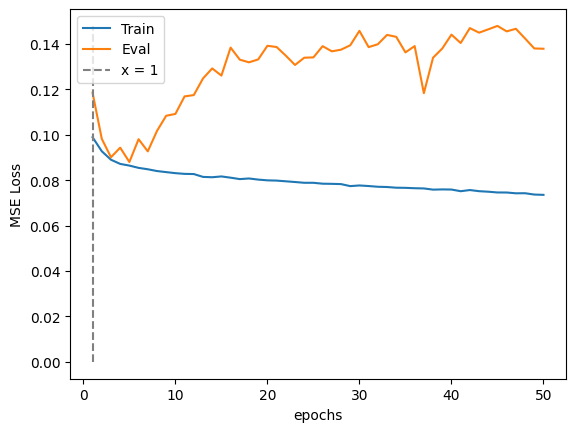

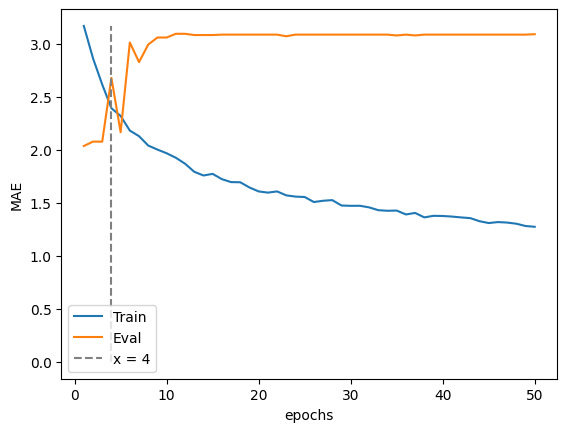

Epoch 001: | Train Loss: 0.07644 | Val Loss: 0.09196 | Train Acc: 1.420| Val Acc: 2.623
Epoch 002: | Train Loss: 0.07546 | Val Loss: 0.09248 | Train Acc: 1.397| Val Acc: 2.684
Epoch 003: | Train Loss: 0.07495 | Val Loss: 0.09056 | Train Acc: 1.367| Val Acc: 2.532
Epoch 004: | Train Loss: 0.07471 | Val Loss: 0.09046 | Train Acc: 1.356| Val Acc: 2.477
Epoch 005: | Train Loss: 0.07462 | Val Loss: 0.09119 | Train Acc: 1.329| Val Acc: 2.638
Epoch 006: | Train Loss: 0.07405 | Val Loss: 0.08989 | Train Acc: 1.339| Val Acc: 2.462
Epoch 007: | Train Loss: 0.07408 | Val Loss: 0.09048 | Train Acc: 1.338| Val Acc: 2.459
Epoch 008: | Train Loss: 0.07441 | Val Loss: 0.09213 | Train Acc: 1.370| Val Acc: 2.580
Epoch 009: | Train Loss: 0.07349 | Val Loss: 0.09076 | Train Acc: 1.329| Val Acc: 2.455
Epoch 010: | Train Loss: 0.07403 | Val Loss: 0.09286 | Train Acc: 1.331| Val Acc: 2.515
Epoch 011: | Train Loss: 0.07334 | Val Loss: 0.09121 | Train Acc: 1.300| Val Acc: 2.515
Epoch 012: | Train Loss: 0.07333

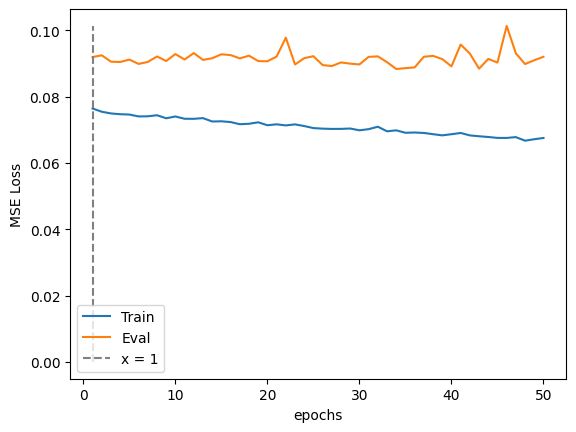

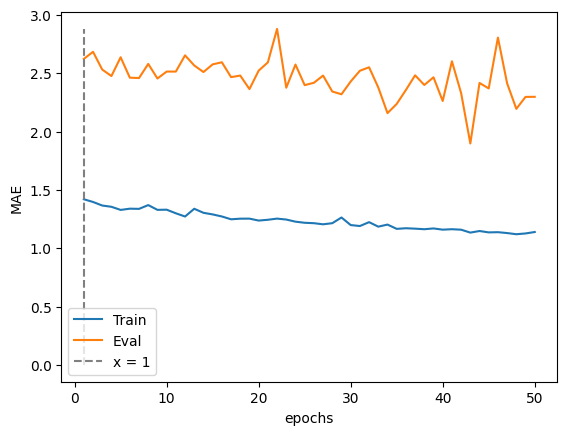

Epoch 001: | Train Loss: 0.07061 | Val Loss: 0.09503 | Train Acc: 1.222| Val Acc: 2.693
Epoch 002: | Train Loss: 0.06972 | Val Loss: 0.09396 | Train Acc: 1.172| Val Acc: 2.628
Epoch 003: | Train Loss: 0.06925 | Val Loss: 0.09452 | Train Acc: 1.176| Val Acc: 2.660
Epoch 004: | Train Loss: 0.07003 | Val Loss: 0.09374 | Train Acc: 1.178| Val Acc: 2.598
Epoch 005: | Train Loss: 0.06946 | Val Loss: 0.09399 | Train Acc: 1.179| Val Acc: 2.707
Epoch 006: | Train Loss: 0.06892 | Val Loss: 0.09295 | Train Acc: 1.153| Val Acc: 2.596
Epoch 007: | Train Loss: 0.06901 | Val Loss: 0.09375 | Train Acc: 1.147| Val Acc: 2.552
Epoch 008: | Train Loss: 0.06836 | Val Loss: 0.09300 | Train Acc: 1.124| Val Acc: 2.549
Epoch 009: | Train Loss: 0.06854 | Val Loss: 0.09268 | Train Acc: 1.138| Val Acc: 2.302
Epoch 010: | Train Loss: 0.06829 | Val Loss: 0.09373 | Train Acc: 1.136| Val Acc: 2.624
Epoch 011: | Train Loss: 0.06831 | Val Loss: 0.09328 | Train Acc: 1.134| Val Acc: 2.680
Epoch 012: | Train Loss: 0.06729

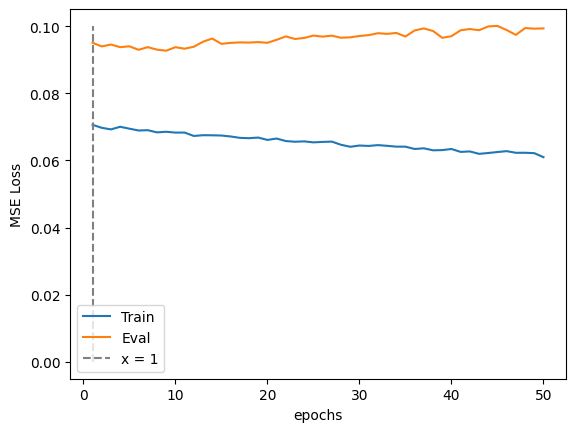

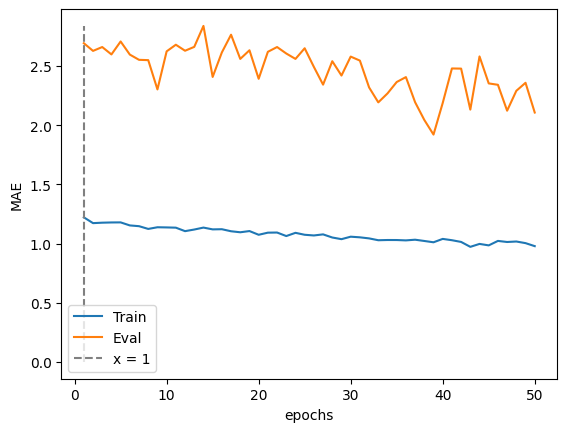

Epoch 001: | Train Loss: 0.06672 | Val Loss: 0.08983 | Train Acc: 1.108| Val Acc: 2.115
Epoch 002: | Train Loss: 0.06601 | Val Loss: 0.08785 | Train Acc: 1.094| Val Acc: 1.917
Epoch 003: | Train Loss: 0.06599 | Val Loss: 0.08829 | Train Acc: 1.075| Val Acc: 1.896
Epoch 004: | Train Loss: 0.06541 | Val Loss: 0.08796 | Train Acc: 1.084| Val Acc: 1.903
Epoch 005: | Train Loss: 0.06447 | Val Loss: 0.08755 | Train Acc: 1.069| Val Acc: 1.884
Epoch 006: | Train Loss: 0.06440 | Val Loss: 0.08766 | Train Acc: 1.070| Val Acc: 1.855
Epoch 007: | Train Loss: 0.06492 | Val Loss: 0.08763 | Train Acc: 1.067| Val Acc: 1.864
Epoch 008: | Train Loss: 0.06459 | Val Loss: 0.08751 | Train Acc: 1.098| Val Acc: 1.826
Epoch 009: | Train Loss: 0.06419 | Val Loss: 0.08416 | Train Acc: 1.065| Val Acc: 1.583
Epoch 010: | Train Loss: 0.06293 | Val Loss: 0.08637 | Train Acc: 1.030| Val Acc: 1.858
Epoch 011: | Train Loss: 0.06410 | Val Loss: 0.08567 | Train Acc: 1.056| Val Acc: 1.817
Epoch 012: | Train Loss: 0.06363

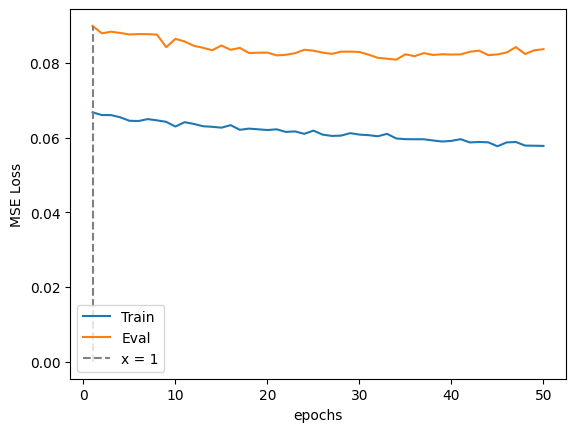

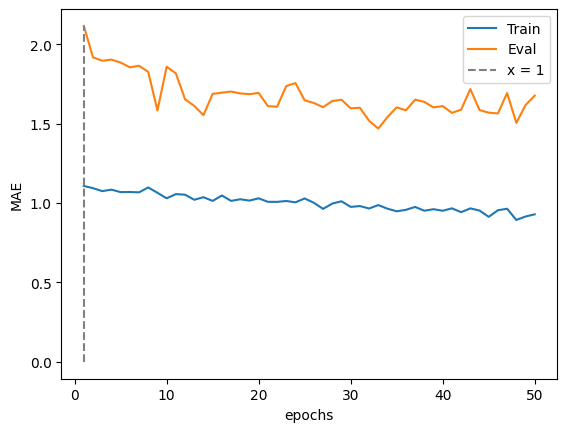

Epoch 001: | Train Loss: 0.06363 | Val Loss: 0.07716 | Train Acc: 1.052| Val Acc: 1.039
Epoch 002: | Train Loss: 0.06198 | Val Loss: 0.07384 | Train Acc: 1.007| Val Acc: 1.013
Epoch 003: | Train Loss: 0.06127 | Val Loss: 0.07428 | Train Acc: 0.981| Val Acc: 0.987
Epoch 004: | Train Loss: 0.06164 | Val Loss: 0.07614 | Train Acc: 0.991| Val Acc: 1.079
Epoch 005: | Train Loss: 0.06119 | Val Loss: 0.07772 | Train Acc: 1.006| Val Acc: 1.000
Epoch 006: | Train Loss: 0.06141 | Val Loss: 0.07494 | Train Acc: 1.006| Val Acc: 0.961
Epoch 007: | Train Loss: 0.06034 | Val Loss: 0.07469 | Train Acc: 0.987| Val Acc: 0.842
Epoch 008: | Train Loss: 0.06007 | Val Loss: 0.07344 | Train Acc: 0.963| Val Acc: 0.947
Epoch 009: | Train Loss: 0.06040 | Val Loss: 0.07414 | Train Acc: 0.983| Val Acc: 0.961
Epoch 010: | Train Loss: 0.05975 | Val Loss: 0.07577 | Train Acc: 0.961| Val Acc: 1.013
Epoch 011: | Train Loss: 0.06000 | Val Loss: 0.07506 | Train Acc: 0.956| Val Acc: 1.066
Epoch 012: | Train Loss: 0.05986

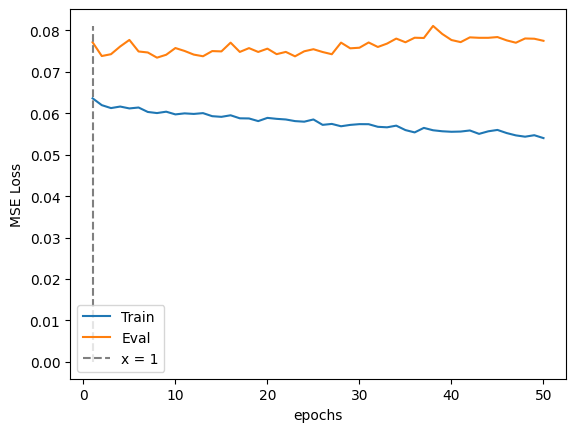

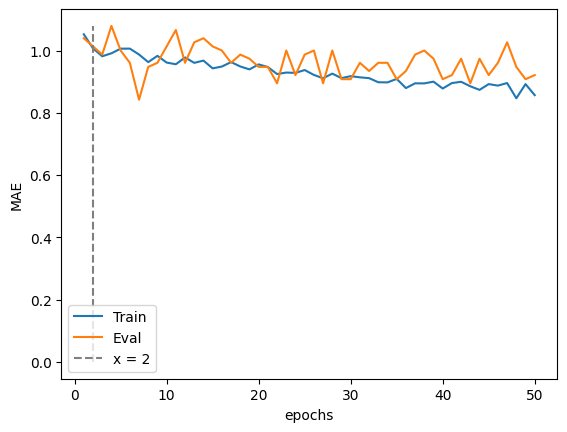

MAE on train set:  0.7261735900033772
min prediction: 0
max prediction: 9

MAE on test set:  2.167369901547117
Error <= 3: 79.04 %
min prediction: 0
max prediction: 9


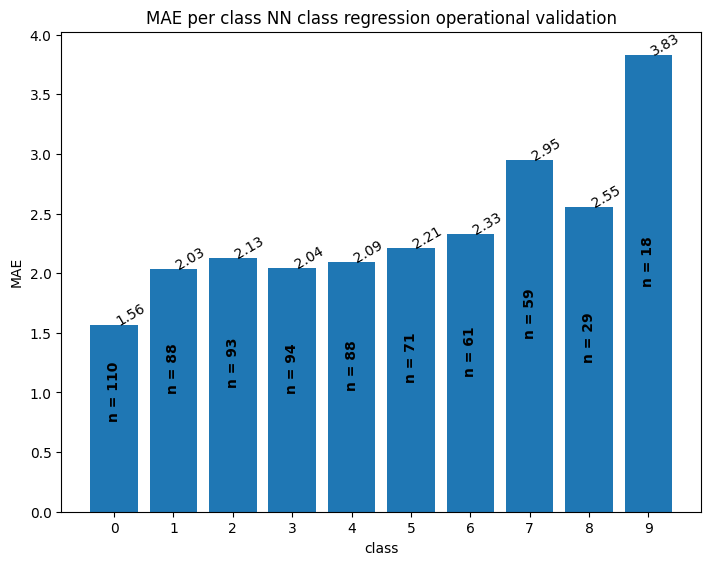

-----------|class error-MAE| difference-----------
mean: 1.4599765048413023
std: 0.5952209614694974
coefficient of variation (std/mean): 0.40769215086389166

----------normalized difference-------------
mean: 0.6432473252304804
std: 0.2622468855606598


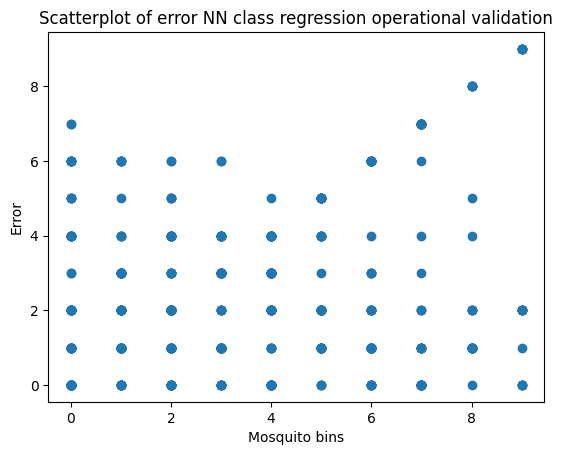

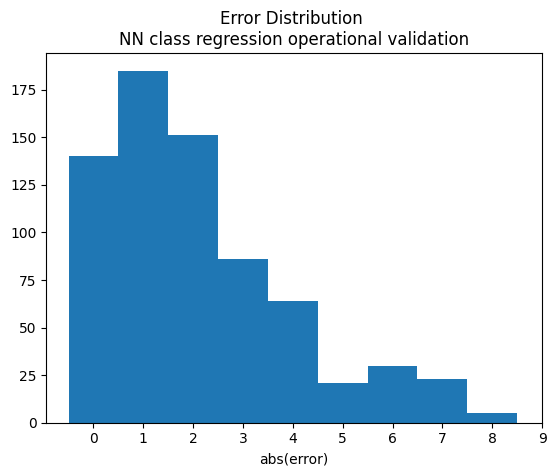

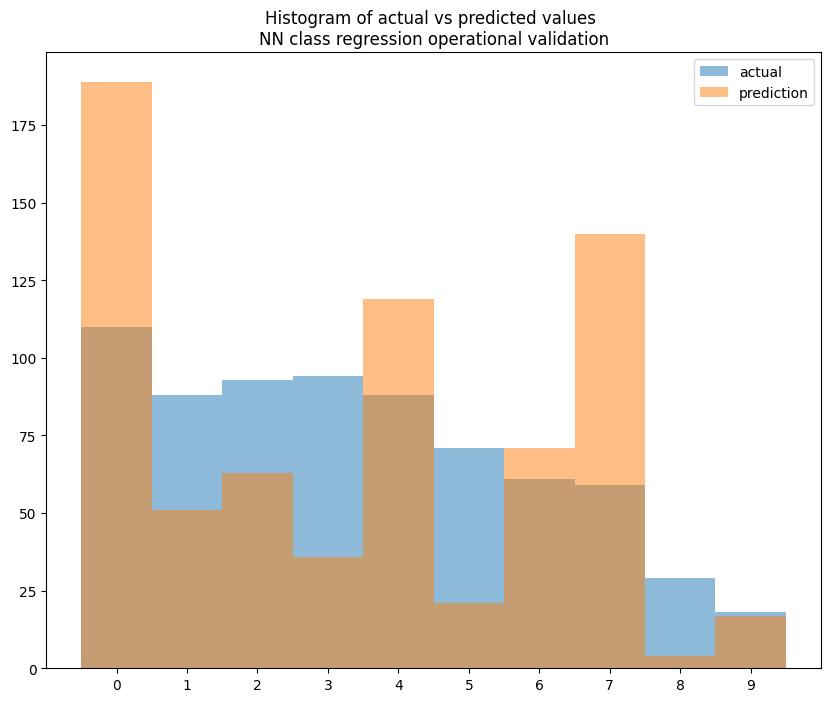

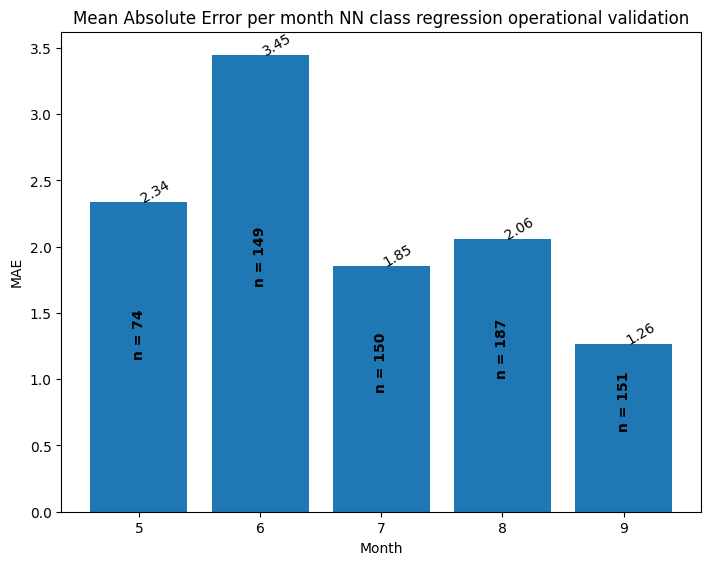

In [10]:
operational_validation(data, model, date='2022-01-01', filepath=path, date_col=date_col, case=case_title, export=exp)